In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('sales.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


| Column Name      | ความหมาย / อธิบาย                                                                 |
|-----------------|----------------------------------------------------------------------------------|
| Row ID           | หมายเลขแถวใน dataset (ใช้แยกแต่ละ record)                                       |
| Order ID         | รหัสคำสั่งซื้อแต่ละรายการ                                                          |
| Order Date       | วันที่ลูกค้าสั่งซื้อสินค้า                                                         |
| Ship Date        | วันที่สินค้าถูกจัดส่ง                                                             |
| Ship Mode        | วิธีการจัดส่ง (เช่น Standard Class, Second Class, Express)                        |
| Customer ID      | รหัสลูกค้าเฉพาะคน                                                                |
| Customer Name    | ชื่อลูกค้า                                                                       |
| Segment         | ประเภทลูกค้า / กลุ่มตลาด (เช่น Consumer, Corporate, Home Office)                 |
| Country          | ประเทศที่ลูกค้าอยู่                                                               |
| City             | เมืองของลูกค้า                                                                   |
| State            | รัฐ / จังหวัดของลูกค้า                                                            |
| Postal Code      | รหัสไปรษณีย์                                                                    |
| Region           | ภูมิภาค (เช่น West, East, Central, South)                                        |
| Product ID       | รหัสสินค้าเฉพาะ                                                                 |
| Category         | หมวดหมู่สินค้า (เช่น Furniture, Office Supplies, Technology)                     |
| Sub-Category     | หมวดย่อยของสินค้า                                                                |
| Product Name     | ชื่อสินค้า                                                                       |
| Sales            | ยอดขายของรายการนั้น (Revenue)                                                     |


### Is there any missing values?

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [93]:
df.loc[df['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


### Fill NaN PostalCode with Burlington's postal code!
(because all is from Burlington and state Vermont)

In [94]:
df2 = df.loc[(df['City'] == 'Burlington') & (df['State'] == 'Vermont')]
df2.shape

(11, 18)

### All records from Burlington City and Vermont State is missing postal code
manual search from google 05401

In [95]:
df['Postal Code'] = df['Postal Code'].fillna(5401)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Convert to DateTime

In [96]:
df.drop('Row ID', axis=1, inplace = True)
df.drop('Order ID', axis=1, inplace = True)

In [97]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [98]:
df = df.set_index('Order Date')
df.head()

,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,
2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Exploratory Data Analysis

### Top 10 Customers

In [99]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).reset_index().head(10)
top_customers

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


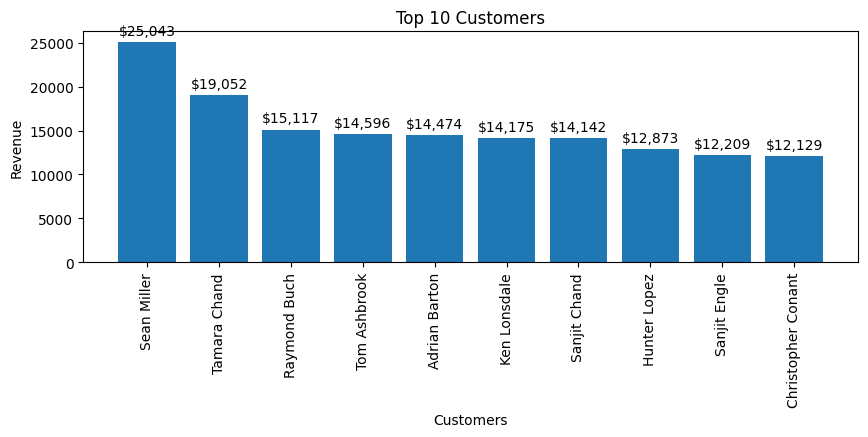

In [100]:
fig, ax = plt.subplots(figsize=(10,3))
ax.set_title("Top 10 Customers")

bars = ax.bar(
    top_customers['Customer Name'],
    top_customers['Sales']
)

ax.set_xlabel("Customers")
ax.set_ylabel("Revenue")
plt.xticks(rotation=90)

ax.bar_label(bars, labels=[f'${v:,.0f}' for v in top_customers['Sales']], padding=3)

plt.show()

### States Revenue

In [101]:
states_revenue = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()
states_revenue.head(5)

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500


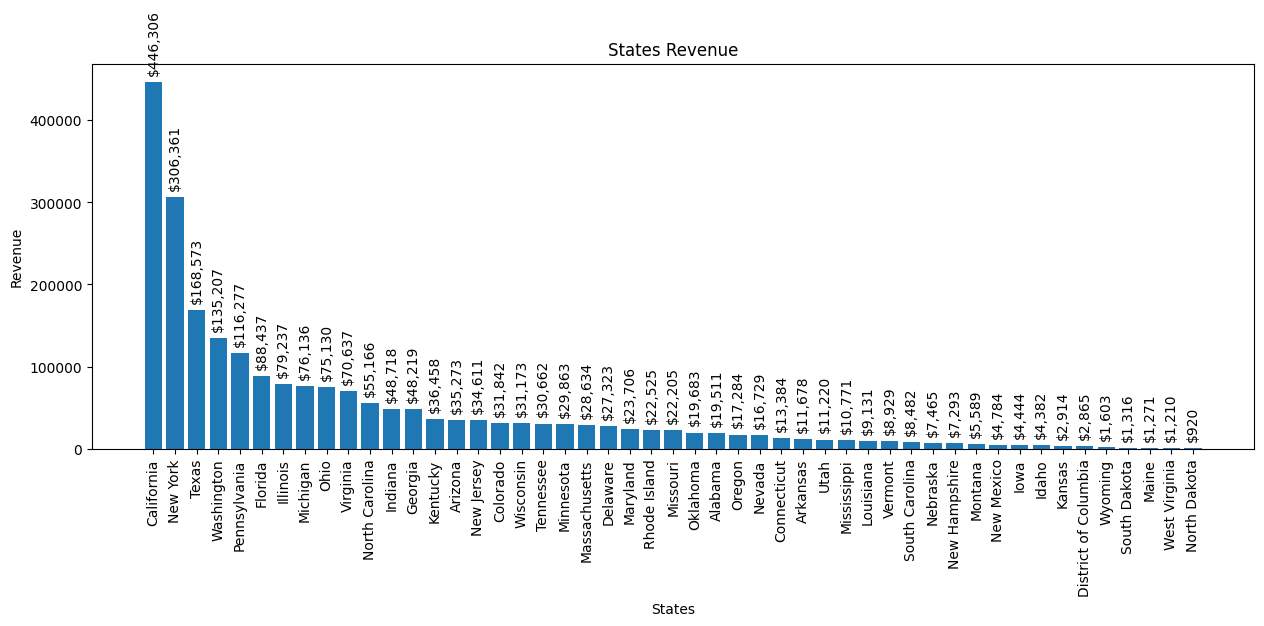

In [102]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("States Revenue")
bars = ax.bar(
    states_revenue['State'],
    states_revenue['Sales']
)
ax.set_xlabel('States')
ax.set_ylabel('Revenue')
plt.xticks(rotation=90)

ax.bar_label(bars, labels=[f"${v:,.0f}" for v in states_revenue['Sales']], rotation=90, padding=5)

plt.show()

### Top 20 Best Selling City

In [103]:
top_20_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index().head(20)
top_20_cities.head()

,City,Sales
0,New York City,252462.547
1,Los Angeles,173420.181
2,Seattle,116106.322
3,San Francisco,109041.120
4,Philadelphia,108841.749


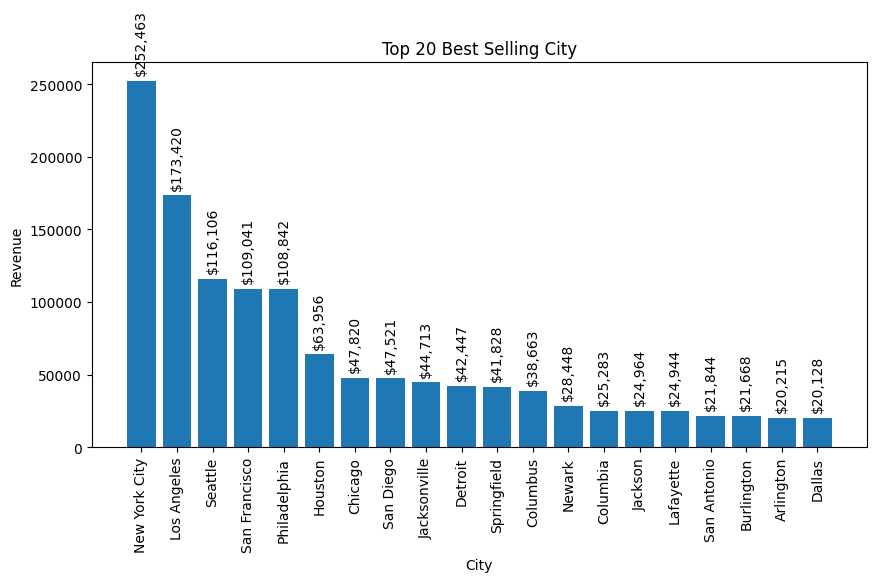

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("Top 20 Best Selling City")
ax.set_xlabel("City")
ax.set_ylabel("Revenue")

bars = ax.bar(
    top_20_cities['City'],
    top_20_cities['Sales']
)
plt.xticks(rotation=90)
ax.bar_label(bars, labels=[f"${v:,.0f}" for v in top_20_cities['Sales']], rotation=90, padding=4)

plt.show()

## Time Series Analysis

In [105]:
df = df.reset_index()
df = df.sort_values(by='Order Date')

df['O Date'] = df['Order Date'].dt.day
df['O Month'] = df['Order Date'].dt.month_name()
df['O Year'] = df['Order Date'].dt.year

df['S Date'] = df['Ship Date'].dt.day
df['S Month'] = df['Ship Date'].dt.month_name()
df['S Year'] = df['Ship Date'].dt.year

df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,O Date,O Month,O Year,S Date,S Month,S Year
7980,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,...,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,3,January,2015,7,January,2015
741,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,...,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4,January,2015,8,January,2015
740,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,4,January,2015,8,January,2015
739,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,...,Office Supplies,Labels,Avery 508,11.784,4,January,2015,8,January,2015
1759,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,...,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,5,January,2015,12,January,2015


### Whole Data

In [106]:
n_years = df['O Year'].unique()
print(n_years)
print(len(n_years))

n_years_2 = df['S Year'].unique()
print(n_years_2)
print(len(n_years_2))

[2015 2016 2017 2018]
4
[2015 2016 2017 2018 2019]
5


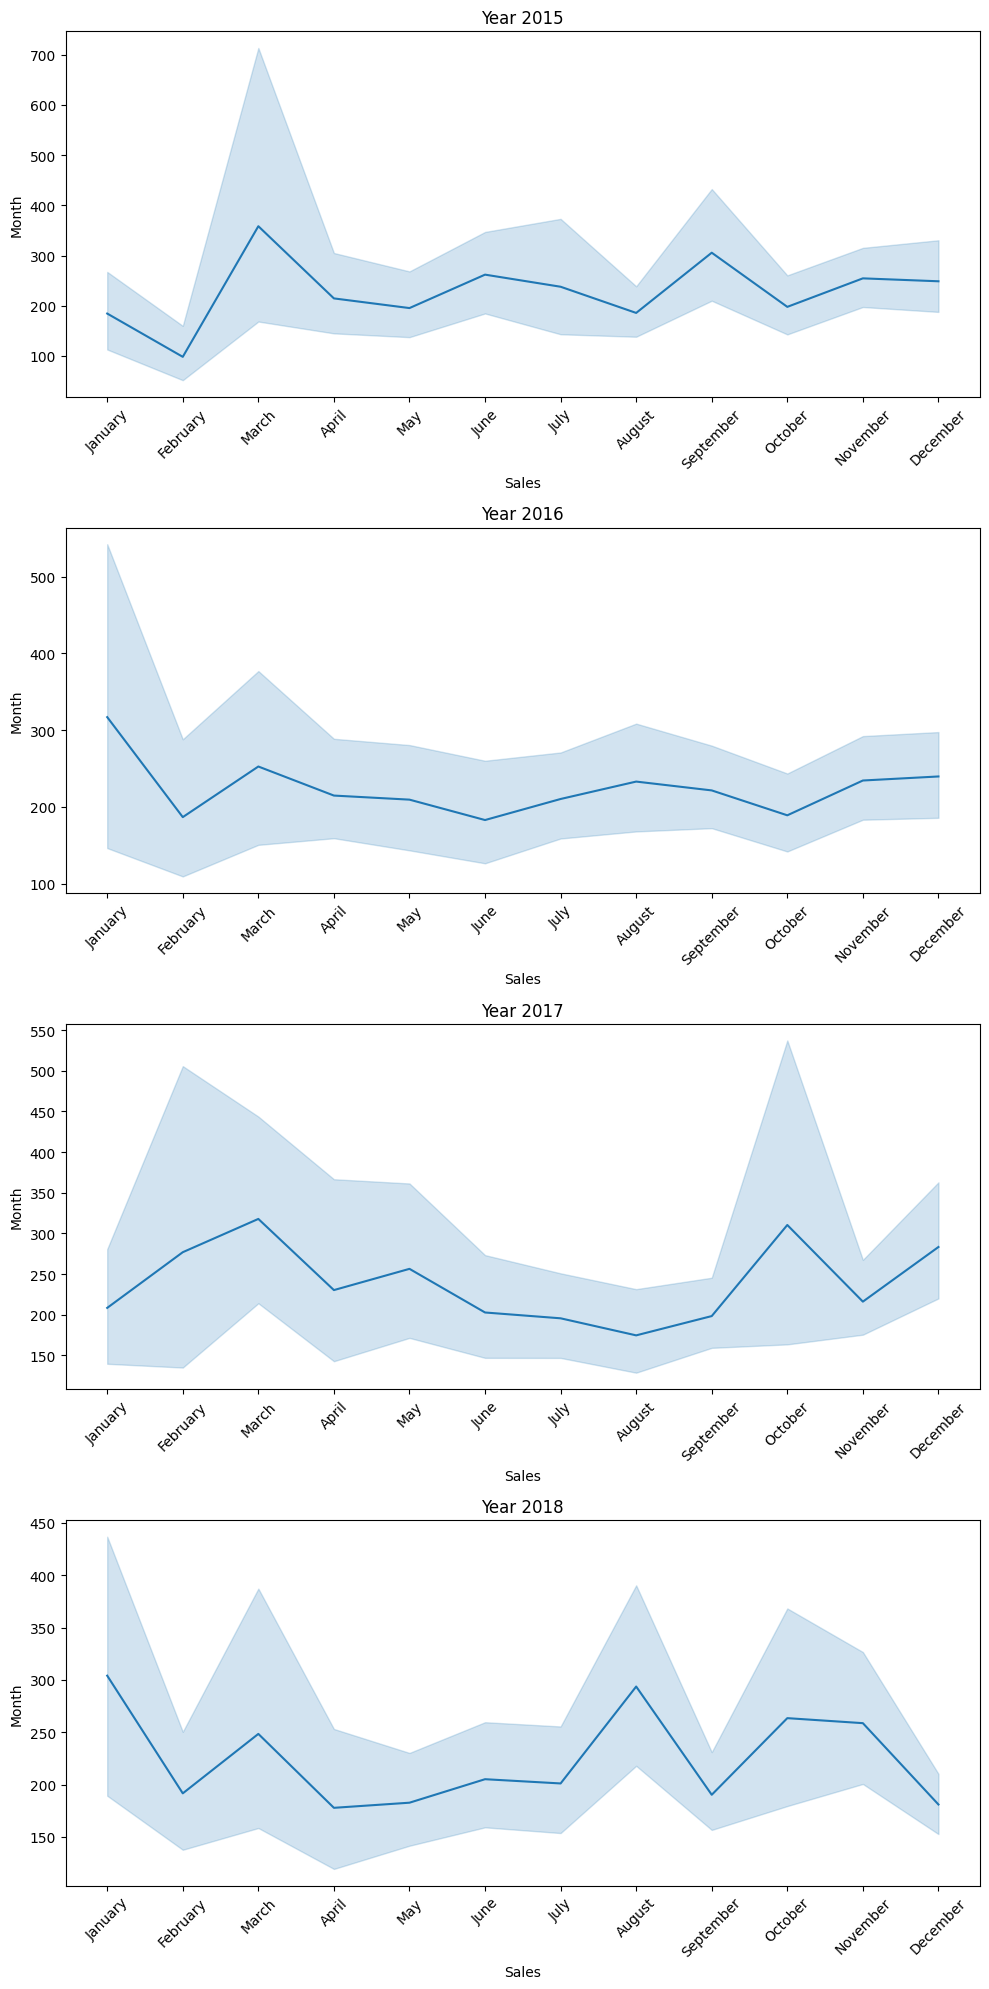

In [126]:
# Based On Order Years
fig, axes = plt.subplots(
    nrows=len(n_years),
    ncols=1,
    figsize=(10, 5 * len(n_years))
)

for i in range(len(n_years)):
    data_year = df[df['O Year'] == n_years[i]]
    sns.lineplot(
        x='O Month',
        y='Sales',
        data=data_year,
        ax=axes[i]
    )

    axes[i].set_title(f"Year {n_years[i]}")
    axes[i].set_xlabel("Sales")
    axes[i].set_ylabel("Month")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Category & Subcategory

In [113]:
categories = df['Category'].unique()
sub_categories = df['Sub-Category'].unique()
print(categories)
print(sub_categories)

['Office Supplies' 'Technology' 'Furniture']
['Paper' 'Binders' 'Storage' 'Labels' 'Art' 'Phones' 'Chairs' 'Fasteners'
 'Furnishings' 'Accessories' 'Envelopes' 'Bookcases' 'Appliances' 'Tables'
 'Supplies' 'Machines' 'Copiers']


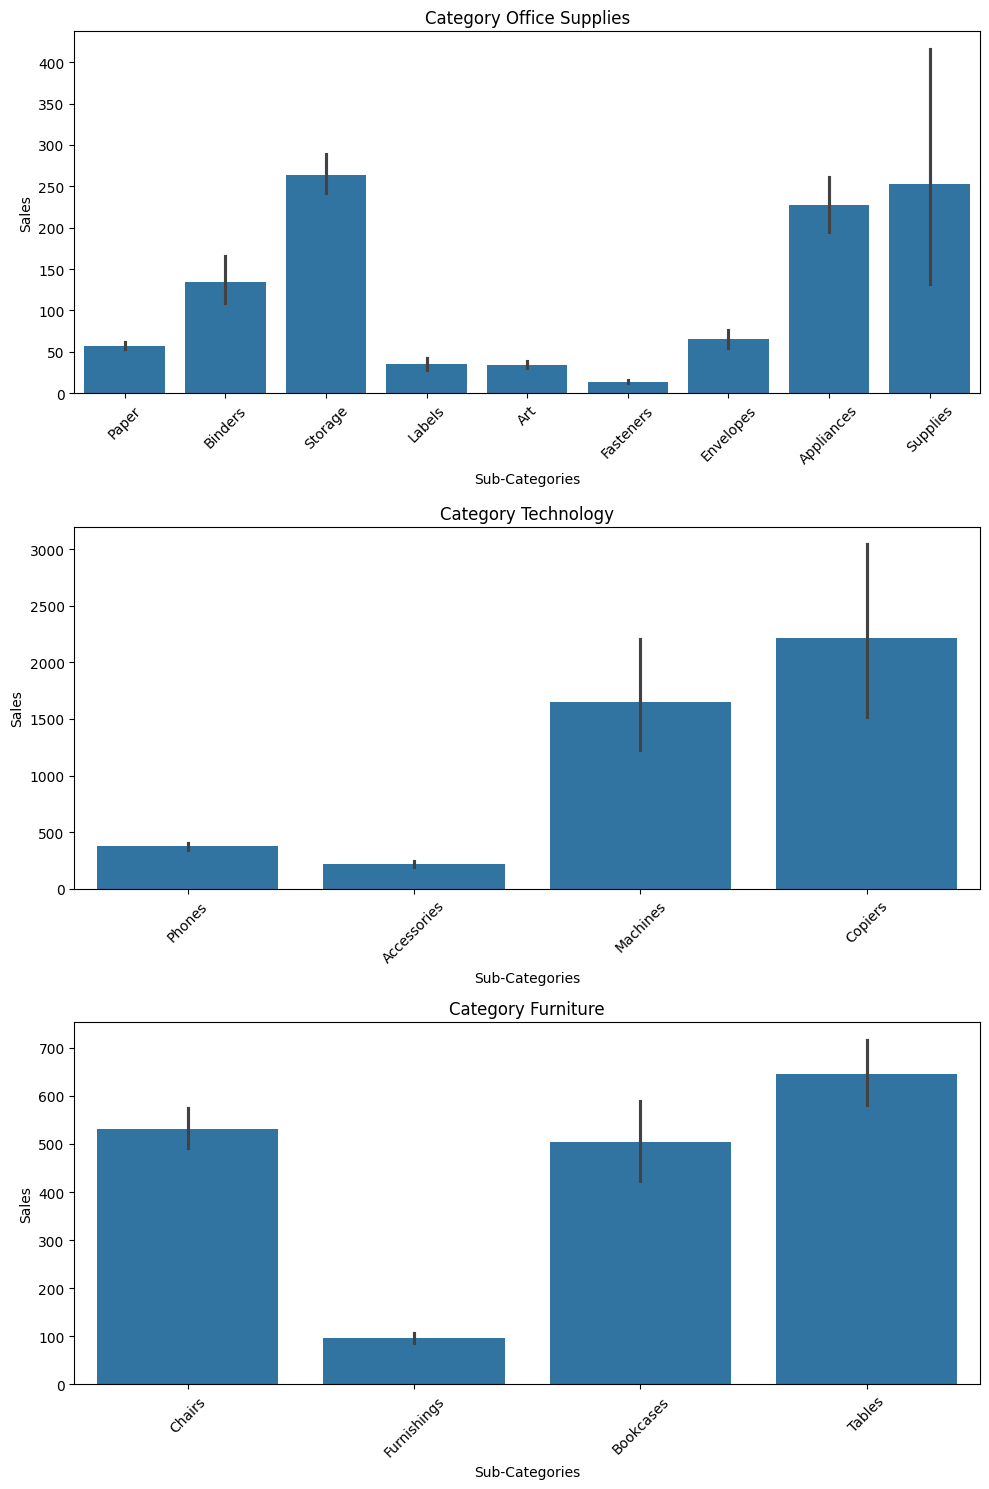

In [122]:
fig, axes = plt.subplots(
    nrows=len(categories),
    ncols=1,
    figsize=(10, 5 * len(categories))
)

for i in range(len(categories)):
    category_data = df[df['Category'] == categories[i]]

    sns.barplot(
        x='Sub-Category',
        y='Sales',
        data=category_data,
        ax=axes[i]
    )
    axes[i].set_title(f"Category {categories[i]}")
    axes[i].set_xlabel("Sub-Categories")
    axes[i].set_ylabel("Sales")
    axes[i].tick_params(axis='x', rotation=45)

fig.tight_layout()